In [1]:
from typing import List
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import os

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 20})

In [2]:
MAIN_DIR = "../../"

plot_dir = f"{MAIN_DIR}/plots/GoF/23Oct9"
_ = os.system(f"mkdir -p {plot_dir}")

In [241]:
# cards_dir = "23May13MP"

file = uproot.concatenate(
    f"/ospool/cms-user/yuzhe/BoostedHWW/prediction/boostedHWW/combine/scripts/f_test/cards/nTF_17/higgsCombineData.GoodnessOfFit.mH125.root"
)

data_ts = file["limit"][0] # data test statistic

file= uproot.concatenate(
    f"/ospool/cms-user/yuzhe/BoostedHWW/prediction/boostedHWW/combine/scripts/f_test/cards/nTF_6/higgsCombineToys6.GoodnessOfFit.mH125.44.root"
)
# //
toy_ts = np.array(file["limit"])  # toy test statistics

In [242]:
data_ts 

11.97150083631277

In [243]:
# toy_ts = np.array(file["limit"])
toy_ts

array([ 4.79710493,  1.32045779,  3.28588535,  7.47623949, 12.77521074,
        1.84885823,  4.6686196 ,  3.6558725 ,  5.68358944,  2.06550431,
        4.88922999,  6.72666351, 14.10463788,  2.26281597,  7.36530791,
        5.41818821,  2.46773292,  6.31798519,  8.78853629,  2.60837526,
       14.25348718,  2.44716663,  3.2351237 ,  7.80649579,  7.99699568,
        4.09574172,  2.08097488,  1.47245283,  2.739253  ,  8.20562282,
        4.18604562,  0.49560343,  3.13432273,  3.48052194,  2.77340617,
        8.32927691,  2.09915224,  8.31231972,  6.48500279,  3.73235675,
        4.77969869,  3.54048918,  2.69485998,  7.98821499,  9.05726169,
        5.06904019,  3.18886597,  5.03615128,  8.00615852,  2.98720818,
        4.75591348,  2.0720115 ,  3.1081359 ,  1.83888187, 18.81289471,
        4.74976604,  2.45656566, 11.37272756,  2.74705942,  7.59082146,
        8.20221201,  6.24117954, 19.61497019,  3.17837479, 10.35121031,
        6.26380445,  3.27525871,  5.83951978,  3.50630015,  6.19

In [244]:
def p_value(data_ts: float, toy_ts: List[float]):
    return np.mean(toy_ts >= data_ts)

In [245]:
pval = p_value(data_ts, toy_ts)
pval

0.06

In [246]:
plot_max = max(np.max(toy_ts), data_ts)
plot_min = min(np.min(toy_ts), data_ts)

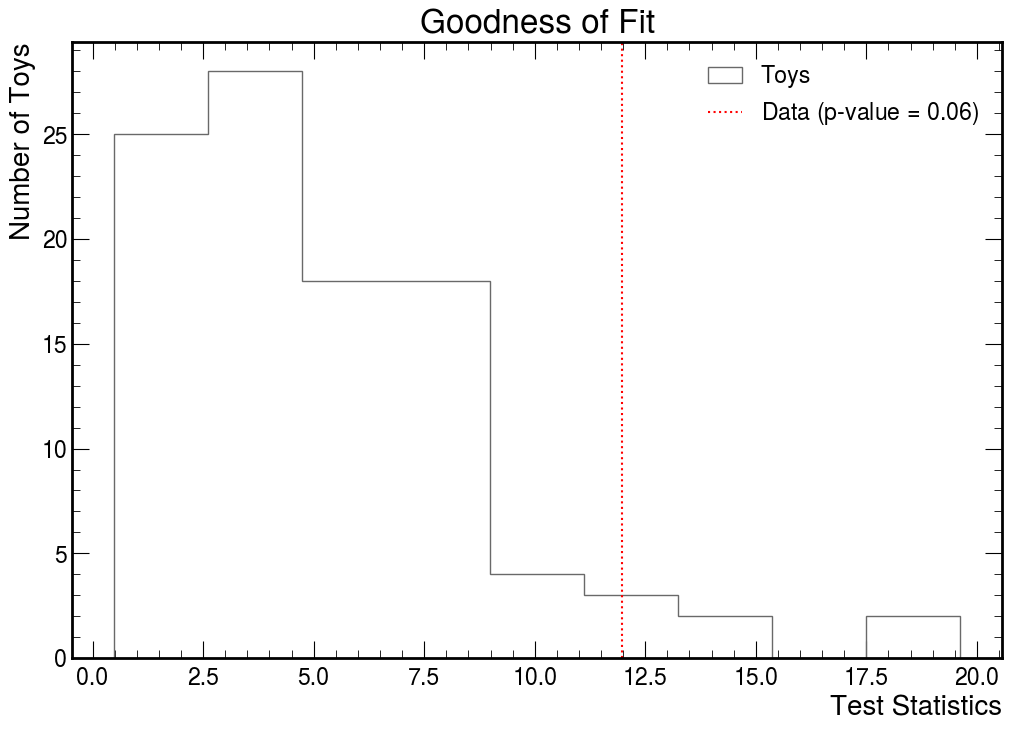

In [247]:
plt.figure(figsize=(12, 8))
_ = plt.hist(
    toy_ts, np.linspace(plot_min, plot_max, 10), color="dimgrey", histtype="step", label="Toys"
)
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof_order0.pdf")

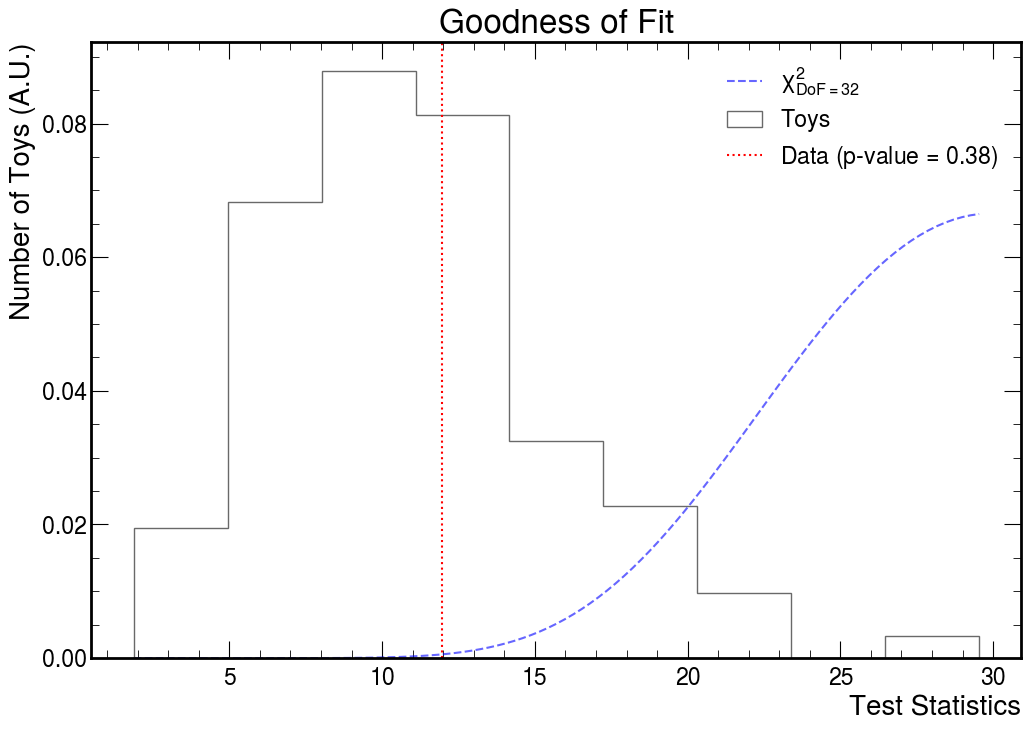

In [239]:
from scipy.stats import chi2

chi2_df = 32

plt.figure(figsize=(12, 8))
x = np.linspace(plot_min, plot_max, 101)
plt.plot(
    x,
    chi2.pdf(x, chi2_df) * 1.3,
    color="blue",
    linestyle="--",
    alpha=0.6,
    label=rf"$\chi^2_{{DoF = {chi2_df}}}$",
)
_ = plt.hist(
    toy_ts,
    np.linspace(plot_min, plot_max, 10),
    density=True,
    color="dimgrey",
    histtype="step",
    label="Toys",
)
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys (A.U.)")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof_chi2.pdf")